# NumPy

In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

## Exercise 1

Consider the polynomial expression
(1)
p(x)=a0+a1x+a2x2+⋯aNxN=∑n=0Nanxn

Earlier, you wrote a simple function p(x, coeff) to evaluate (1) without considering efficiency

Now write a new function that does the same job, but uses NumPy arrays and array operations for its computations, rather than any form of Python loop

(Such functionality is already implemented as np.poly1d, but for the sake of the exercise don’t use this class)

`Hint: Use np.cumprod()`


In [2]:
def np_compute_poly(coeffs:np.ndarray,x:np.float64)->np.float64:
    
    x_arr = np.empty((coeffs.shape[0]))
    x_arr[0],x_arr[1:]=1, x
    return np.cumprod(x_arr) @ coeffs

In [3]:
coeffs = np.ones(3)
x = 1

coeffs.shape, x, np_compute_poly(coeffs=coeffs,x=x)

((3,), 1, 3.0)

## Exercise 2

Let `q` be a NumPy array of length n with `q.sum() == 1`

Suppose that `q` represents a probability mass function

We wish to generate a discrete random variable x
such that P{x=i}=qi

In other words, `x` takes values in `range(len(q))` and `x = i` with probability `q[i]`

The standard (inverse transform) algorithm is as follows:

    Divide the unit interval [0,1] into n subintervals I0,I1,…,In−1 such that the length of Ii is qi
    
    Draw a uniform random variable U on [0,1] and return the i such that U∈Ii

The probability of drawing i is the length of Ii, which is equal to qi

We can implement the algorithm as follows:

```
from random import uniform

def sample(q):
    a = 0.0
    U = uniform(0, 1)
    for i in range(len(q)):
        if a < U <= a + q[i]:
            return i
        a = a + q[i
```

If you can’t see how this works, try thinking through the flow for a simple example, such as `q = [0.25, 0.75]` It helps to sketch the intervals on paper

Your exercise is to speed it up using NumPy, avoiding explicit loops

* Hint: Use `np.searchsorted` and `np.cumsum`

If you can, implement the functionality as a class called discreteRV, where:

* the data for an instance of the class is the vector of probabilities `q`
* the class has a `draw()` method, which returns one draw according to the algorithm described above.

If you can, write the method so that `draw(k)` returns `k` draws from `q`

In [4]:
class discreteRV:
    
    def __init__(self, q:np.ndarray)->None:
        
        self.q = q
        #prep q for use with searchsorted
        self.Qsum = np.cumsum(self.q)
        
    def draw(self, k:int=1)->np.ndarray:
        # return k draws from q
        # using searchsorted
        
        return self.Qsum.searchsorted(np.random.uniform(0,1, size=k))

True 



(array([ 9.,  7.,  3.,  5.,  9.,  8., 10.,  5.,  7., 37.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

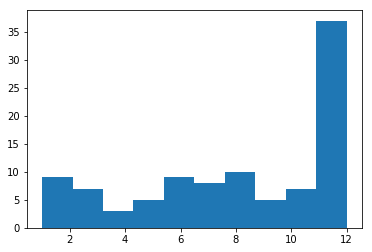

In [5]:
q = (0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.22)

d = discreteRV(q)
print(sum(q)==1,"\n")

plt.hist(d.draw(100))

## Exercise 3

Recall our earlier discussion of the empirical cumulative distribution function:

#### From OOP-II - Ex-1

The empirical cumulative distribution function (ecdf) corresponding to a sample {Xi}ni=1 is defined as

$$F_n(x) := \frac{1}{n}  \sum_{i=1}^n \mathbf{1}\{X_i \leq x\}
  \qquad (x \in \mathbb{R})$$

Here **$\mathbf{1}\{X_i \leq x\}$** is an indicator function *(one if **$X_i \leq x$** and zero otherwise)* and hence **$F_n(x)$** is the fraction of the sample that falls below x.

The *Glivenko–Cantelli* Theorem states that, provided that the sample is iid, the *ecdf* **Fnn** converges to the true distribution function F.

Implement ***$F_n$*** as a class called ***`ECDF`***, where

* A given sample $\{X_i\}_{i=1}^n$ are the instance data, stored as `self.observations`
* The class implements a `__call__` method that returns $F_n(x)$ for any $x$

Your code should work as follows (modulo randomness)

```python
from random import uniform

samples = [uniform(0, 1) for i in range(10)]
F = ECDF(samples)
F(0.5)  # Evaluate ecdf at x = 0.5
```

```none
0.29
```

```python
F.observations = [uniform(0, 1) for i in range(1000)]
F(0.5)
```

```none
0.479
```

#### Back to Ex-2(Part-2)

Your task is to:
    * Make the `__call__` method more efficient using NumPy 
    * Add a method that plots the ECDF over [a,b], where a and b are method parameters.

In [8]:
class ECDF:
    
    def __init__(self, samples:np.ndarray)->None:
        
        self.observations = np.array(samples)
        
    def __call__(self, x:np.float64)->np.float64:
        
        return np.mean(self.observations <= x)
        
    def plot(self,a:float=None,b:float=None)->None:
        
        if a is None:
            a = self.observations.min() - self.observations.std()
        if b is None:
            b = self.observations.min() + self.observations.std()
            
        values = np.linspace(a,b,100)
        f = np.vectorize(self.__call__)
        plt.plot(values, f(values))
        plt.show()

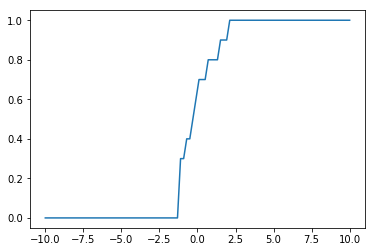

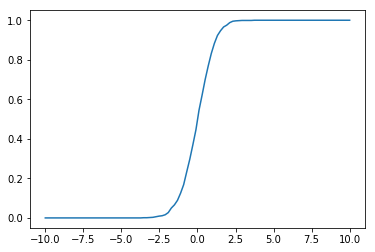

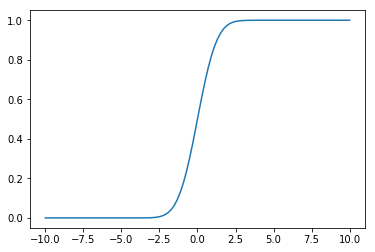

0.8 0.816 0.815976


In [17]:
samples_10 = [np.random.randn(10)]
samples_1K = [np.random.randn(1000)]
samples_1M = [np.random.randn(1000000)]

F_10,F_1K,F_1M = ECDF(samples_10),ECDF(samples_1K),ECDF(samples_1M)

F_10.plot(-10,10),F_100.plot(-10,10),F_10K.plot(-10,10)
print(F_10(0.9),F_1K(0.9),F_1M(0.9))